In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func,inspect

In [6]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [7]:
# reflect an existing database into a new model
Base = automap_base()


# reflect the tables
Base.prepare(engine, reflect=True)




In [8]:
# View all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
recent_date

('2017-08-23')

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

latest_date=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date

('2017-08-23')

In [13]:
# Calculate the date one year from the last date in data set.
date_year_ago = dt.date(2017, 8, 23)-dt.timedelta(days=365)
print(date_year_ago)

2016-08-23


In [14]:
# Perform a query to retrieve the data and precipitation scores
result=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= date_year_ago).all()

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(result)
df.set_index('date')
df=df.dropna()
df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [16]:
# Sort the dataframe by date
df = df.sort_values("date")
df.head()

,date,prcp
0,2016-08-23,0.00
1192,2016-08-23,0.02
704,2016-08-23,0.05
1881,2016-08-23,0.70
361,2016-08-23,0.15


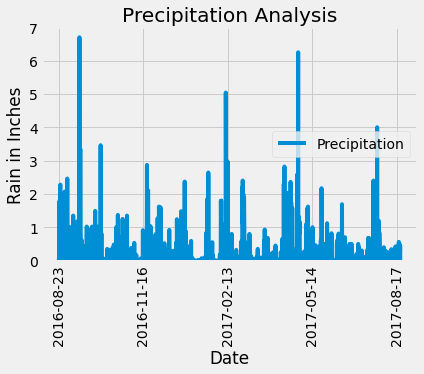

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot('date', 'prcp')
plt.ylim(0,7)
plt.xlabel("Date")
plt.ylabel("Rain in Inches")
plt.title("Precipitation Analysis")
plt.legend(["Precipitation"])
plt.xticks(rotation=90)
plt.show()

In [18]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_data_df.describe()


NameError: name 'precip_data_df' is not defined

# Exploratory Station Analysis

In [1]:

# Design a query to calculate the total number stations in the dataset


In [2]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.


In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()